<a href="https://colab.research.google.com/github/Sriharish19/Mobile_price_classification_ml_model/blob/main/SH_Mobile_price_range_classification_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement:**
**In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.**
### **Data Description -**
* **Battery_power** - Total energy a battery can store in one time measured in mAh
* **Blue** - Has bluetooth or not
* ***Clock_speed*** - speed at which microprocessor executes instructions
* ***Dual_sim*** - Has dual sim support or not
* ***Fc*** - Front Camera mega pixels
* ***Four_g*** - Has 4G or not
* ***Int_memory*** - Internal Memory in Gigabytes
* ***M_dep*** - Mobile Depth in cm
* ***Mobile_wt*** - Weight of mobile phone
* ***N_cores*** - Number of cores of processor
* ***Pc*** - Primary Camera mega pixels
* ***Px_height*** - Pixel Resolution Height
* ***Px_width*** - Pixel Resolution Width
* ***Ram*** - Random Access Memory in Mega Bytes
* ***Sc_h*** - Screen Height of mobile in cm
* ***Sc_w*** - Screen Width of mobile in cm
* ***Talk_time*** - longest time that a single battery charge will last when you are
* ***Three_g*** - Has 3G or not
* ***Touch_screen*** - Has touch screen or not
* ***Wifi*** - Has wifi or not
* ***Price_range*** - This is the target variable with value of 
* 0(low cost), 
* 1(medium cost),
* 2(high cost) and
* 3(very high cost).
* Thus our target variable has 4 categories so basically it is a Multiclass classification problem.

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC




import math

In [2]:
 # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the file
df = pd.read_csv('/content/drive/MyDrive/Capstone_mobile_price_range/Copy of data_mobile_price_range.csv')
df1 = pd.read_csv('/content/drive/MyDrive/Capstone_mobile_price_range/Copy of data_mobile_price_range.csv')

In [4]:
#Shape
df.shape

(2000, 21)

In [5]:
# first 5 rows
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [6]:
# bottom 5 rows
df.tail()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
# Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
# Info
df.info()
# no non-null values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Summary
df.describe().T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [12]:
# Checking the number of observations having screen width value as 0.
(df['sc_w'].values == 0).sum()

180

In [13]:
# Checking the number of observations having px_height value as 0.
(df['px_height'].values == 0).sum()

2

In [14]:
# As there are only 2 observations having px_height=0. so we will drop it.
df.drop(df[df['px_height'] == 0].index, inplace = True)

In [15]:
# Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [16]:
# Numerical variables
df.describe().columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [17]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)

In [18]:
# import KNN imputer frio sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [19]:
# Checking shape
df.shape

(1998, 21)

In [20]:
# target variable's counts
price_range_values=df['price_range'].value_counts()
price_range_values

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64

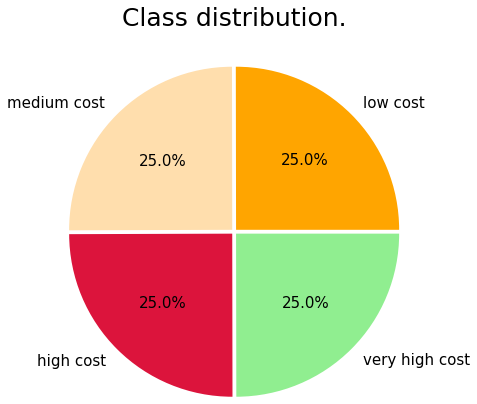

In [21]:
import matplotlib.colors as mcolors
# Plotting the pie chart
plt.figure(figsize = (5,5))
plt.pie(price_range_values , labels = ["low cost", "medium cost", "high cost", "very high cost"],
        explode = [0.025,0.025,0.025,0.025], 
        colors = ['orange','navajowhite','crimson','lightgreen'], 
        radius = 1.5, textprops = {'fontsize': 15}, autopct = '%0.1f%%' )
plt.title('Class distribution.', fontsize = 25, pad=70)
plt.show()

In [22]:
columns=df.columns

In [23]:
columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

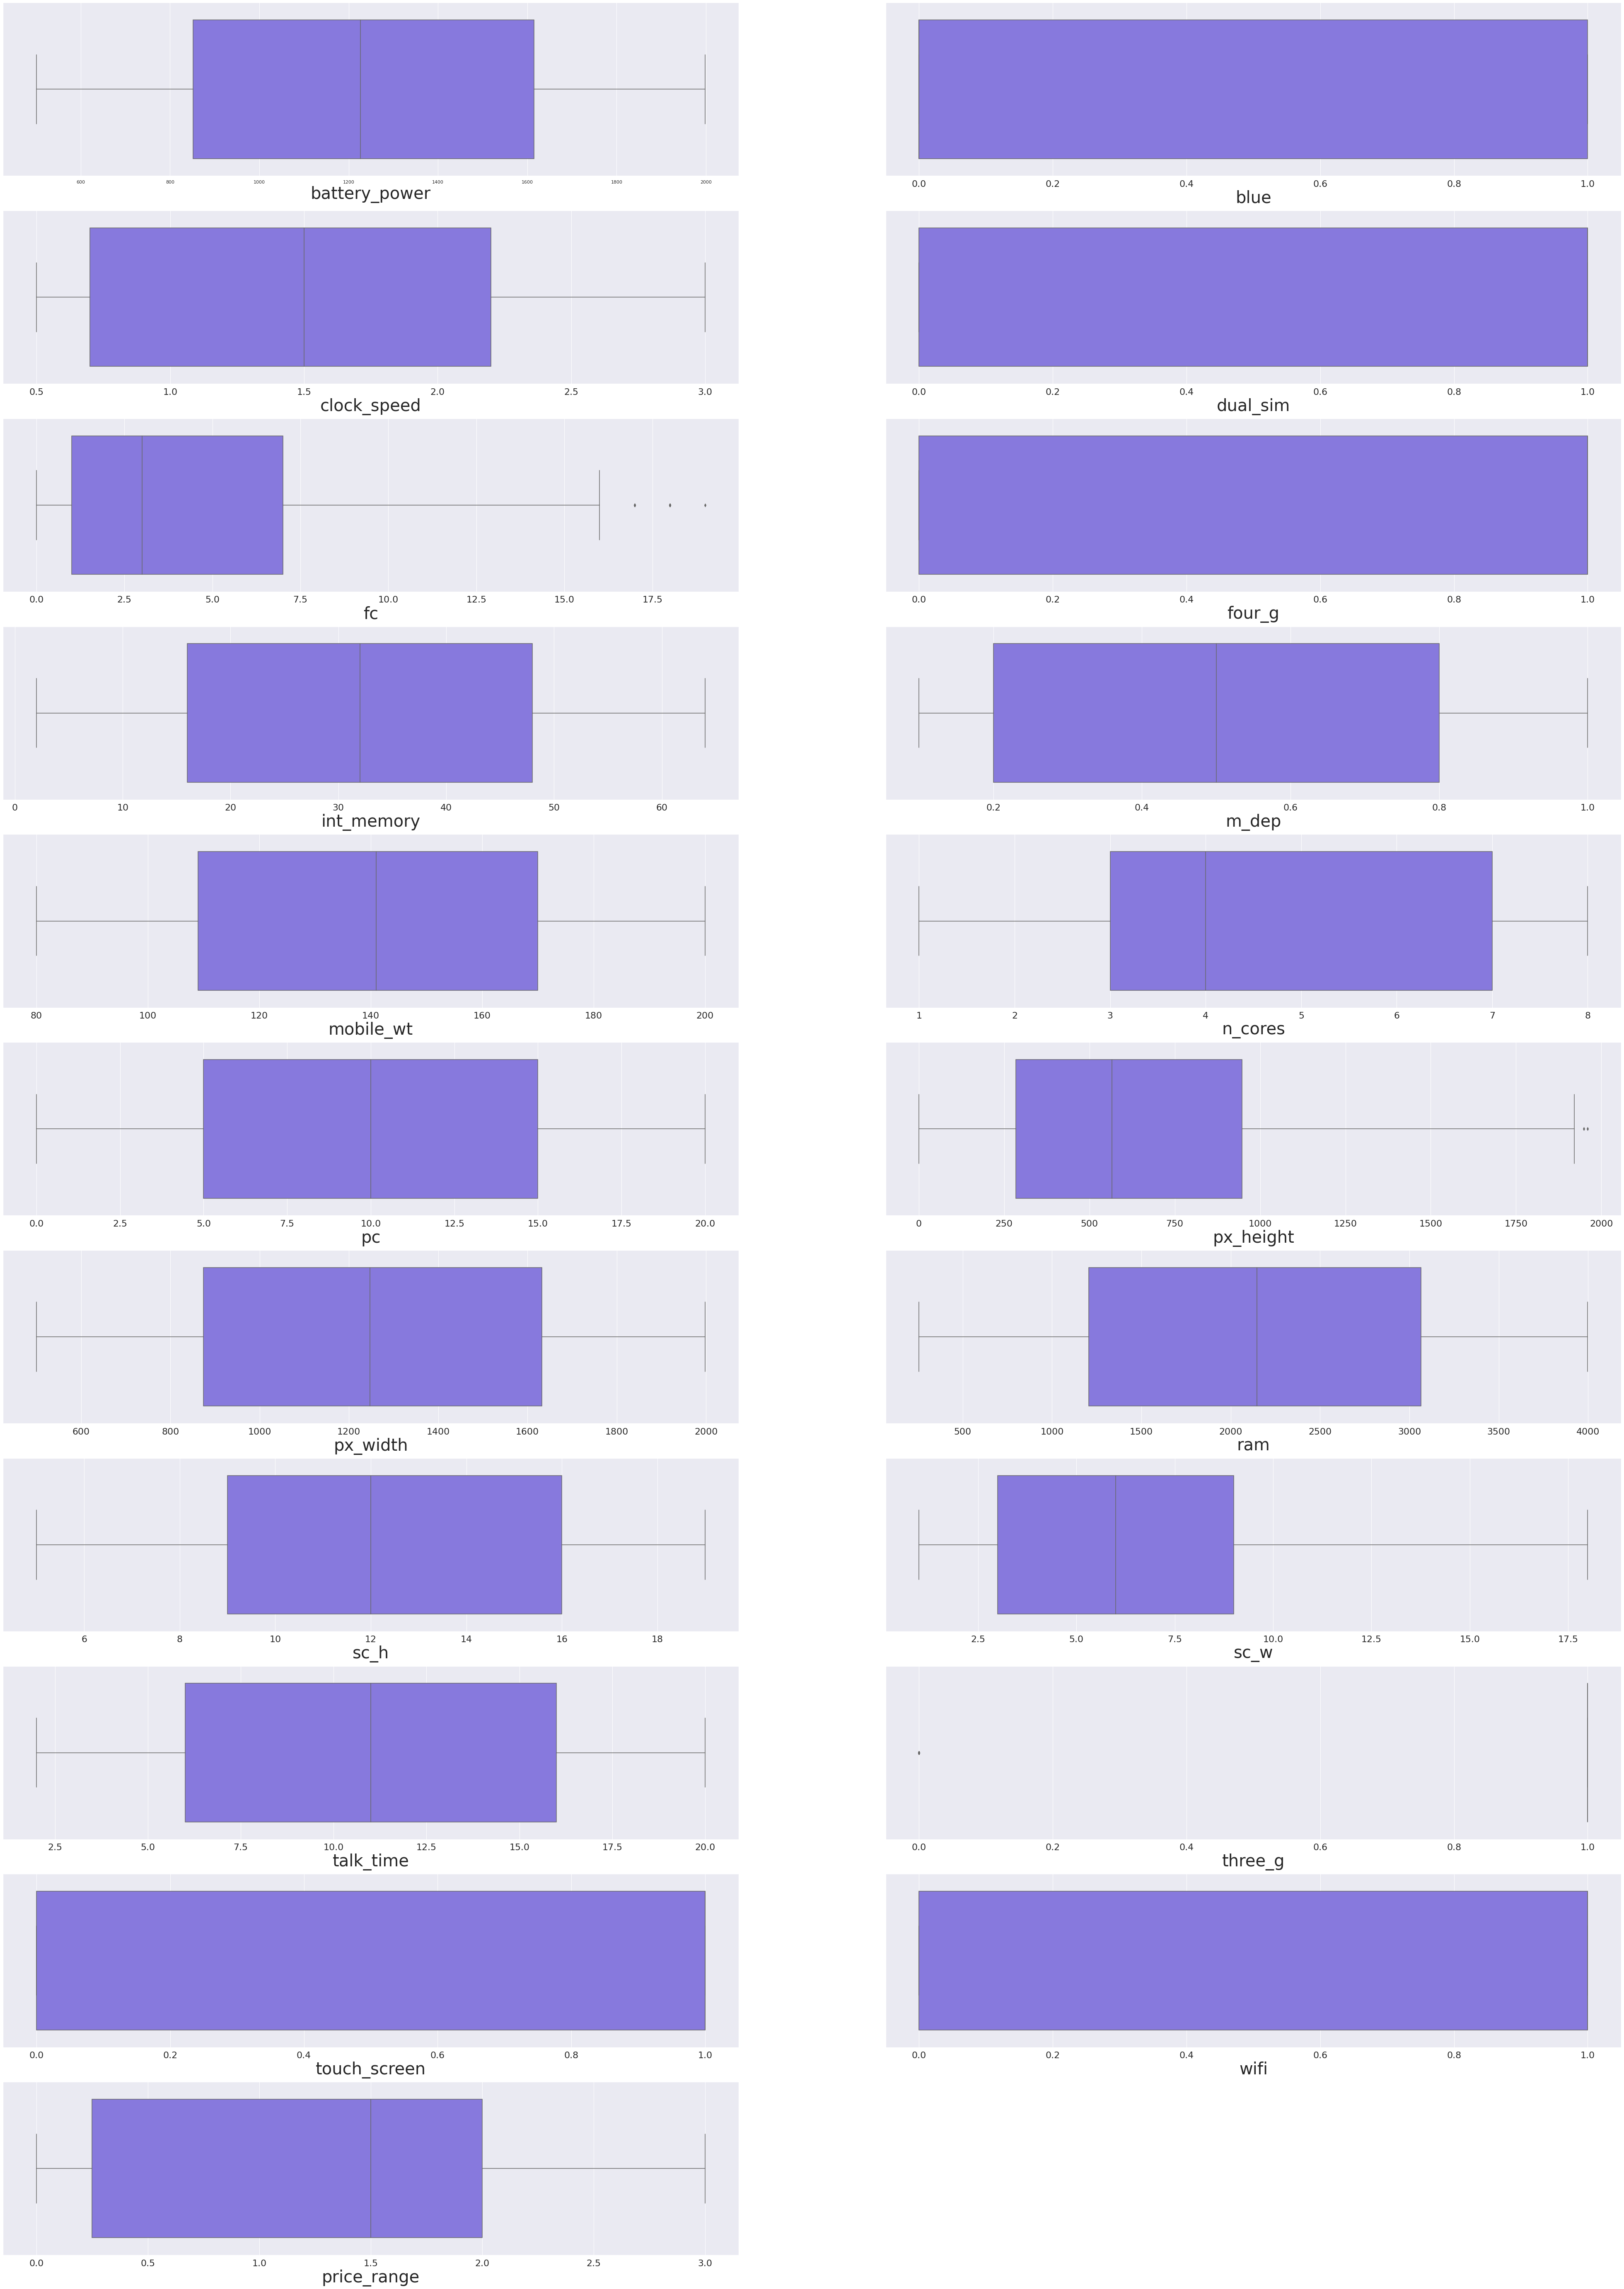

In [ ]:
# Box plot to detect outliers

# lst_box = columns
# plt.figure(figsize = (70,100))
# sns.set_theme()
# for i in enumerate(lst_box):
#     plt.subplot(11, 2,i[0]+1)
#     sns.set(font_scale = 2)
#     sns.boxplot(df[i[1]],color='mediumslateblue')
#     plt.xlabel(i[1],fontsize=40)

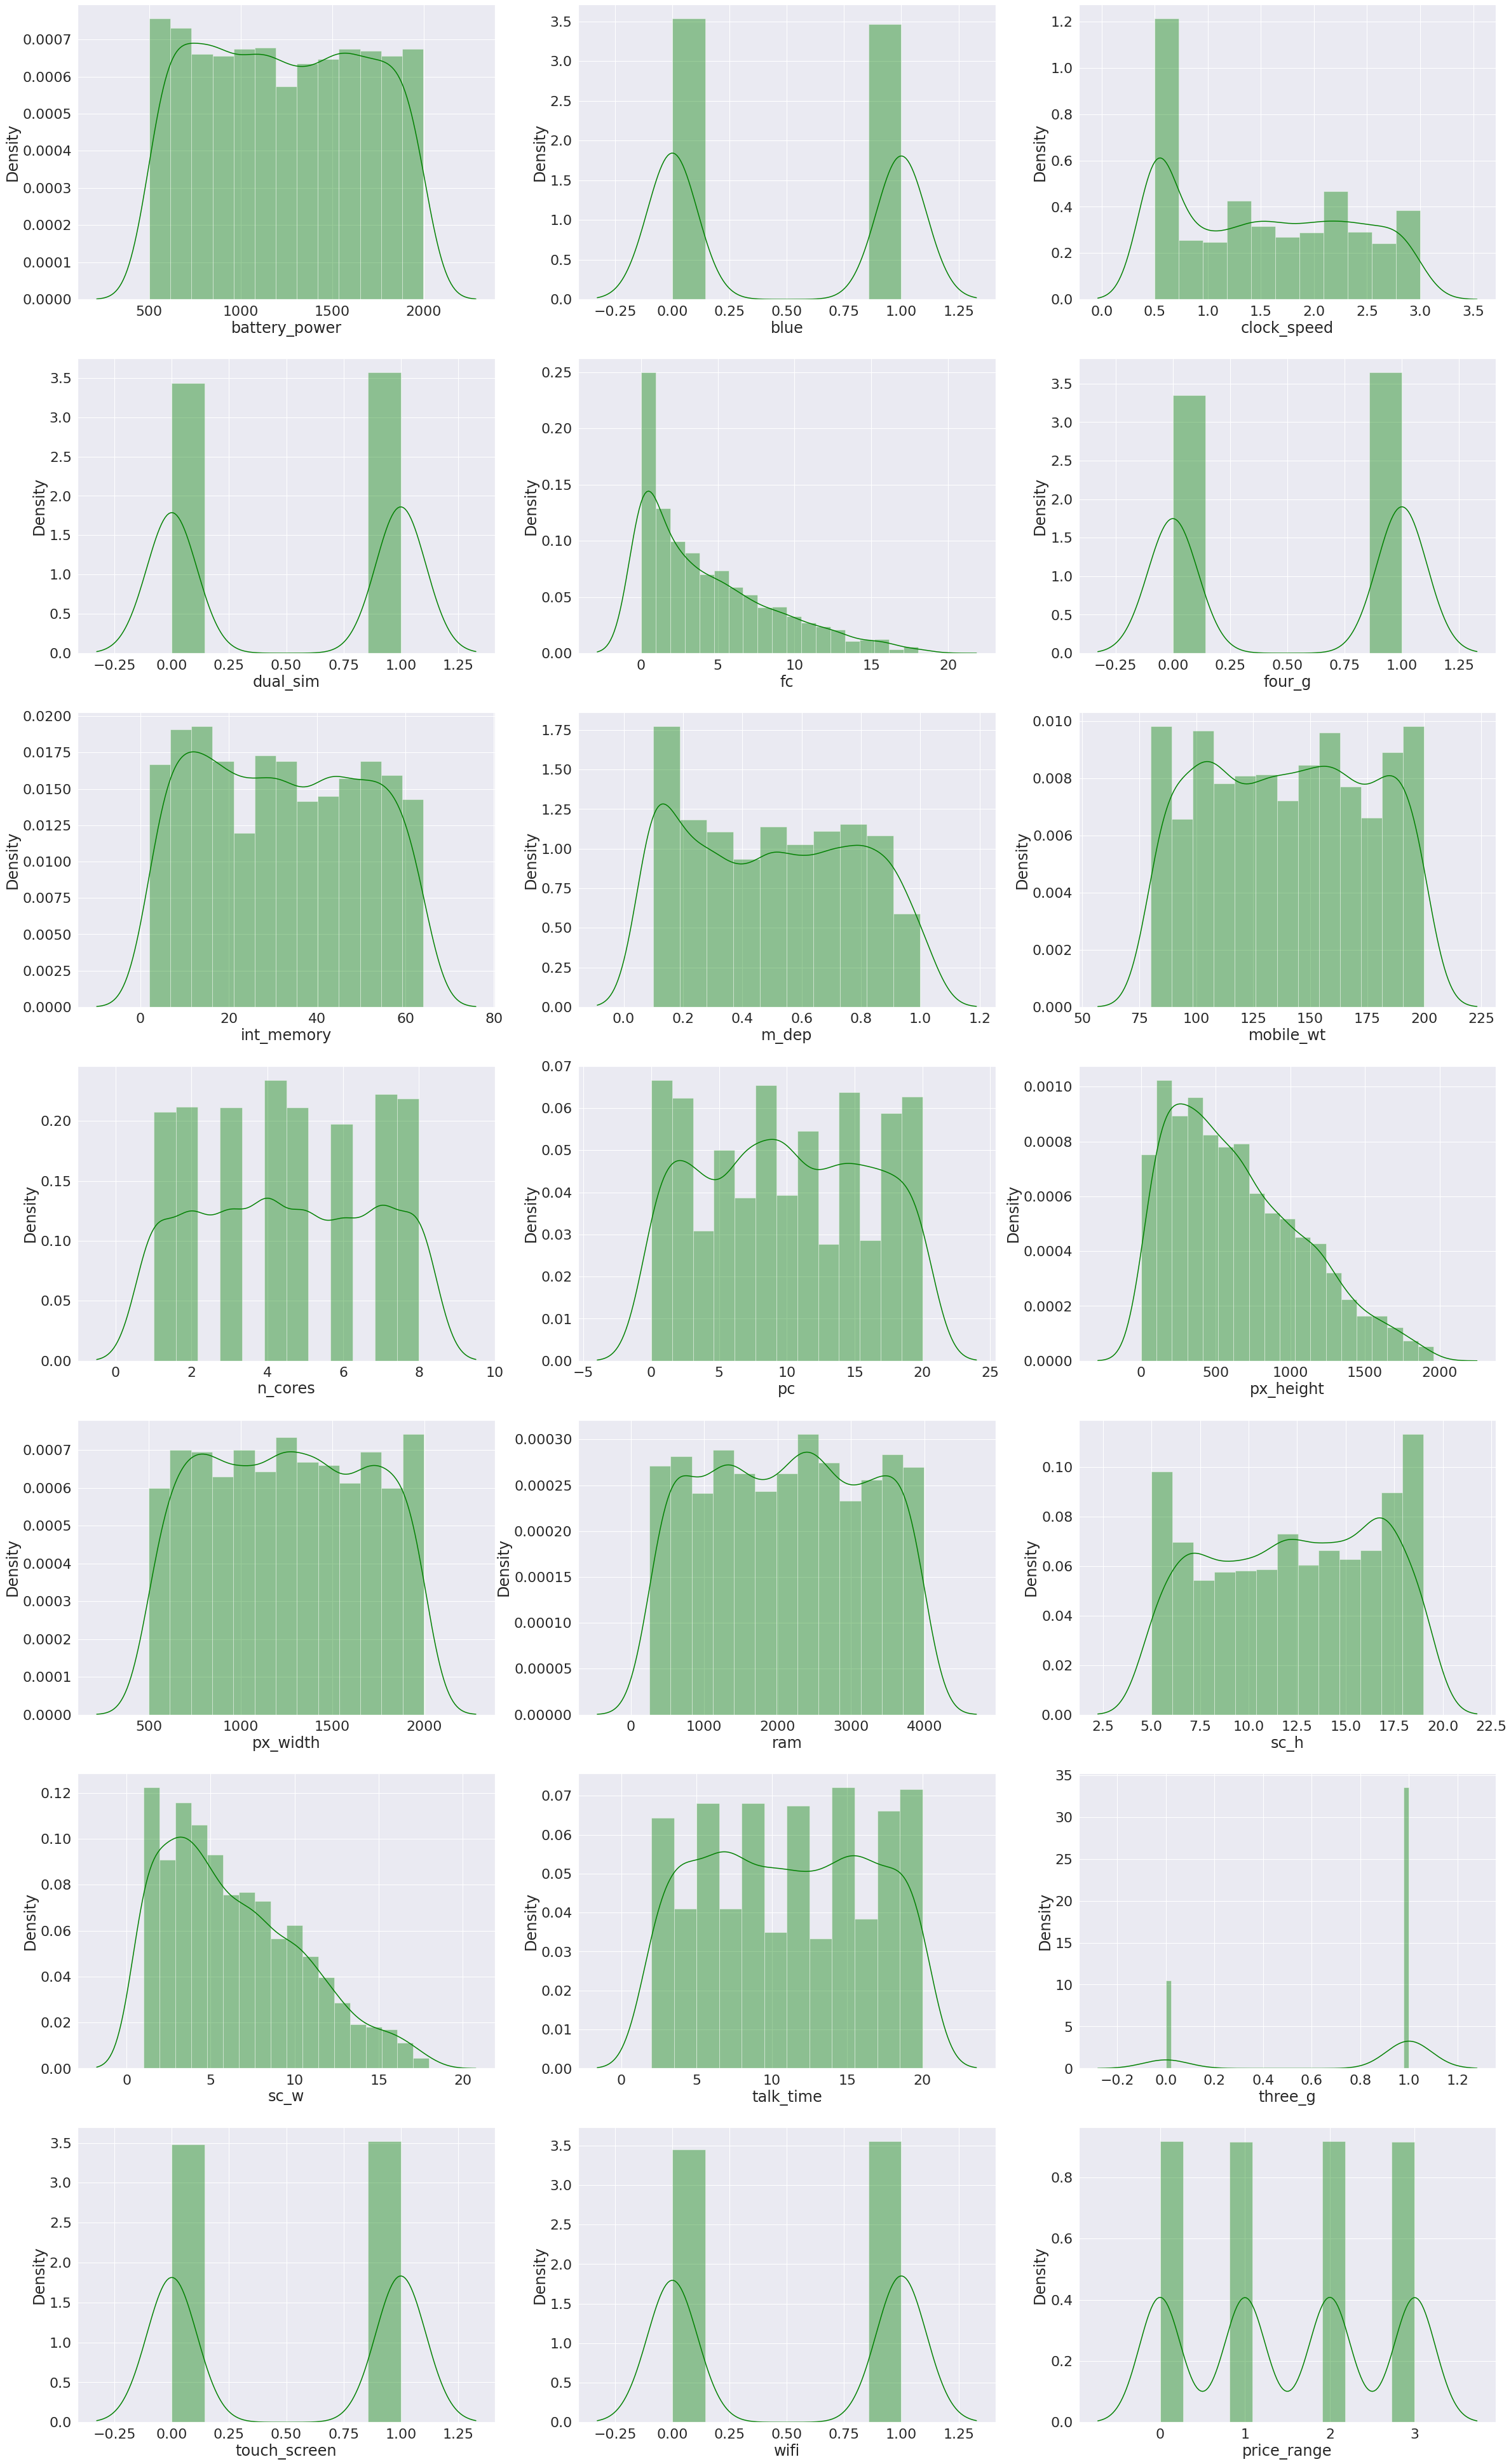

In [ ]:
# Distribution plot for numerical variables

# lst_dist = columns
# plt.figure(figsize = (40,70))
# sns.set_theme()
# for i in enumerate(lst_dist):
#   sns.set(font_scale = 2)
#   plt.subplot(7, 3,i[0]+1)
#   sns.distplot(df[i[1]],color = 'green')

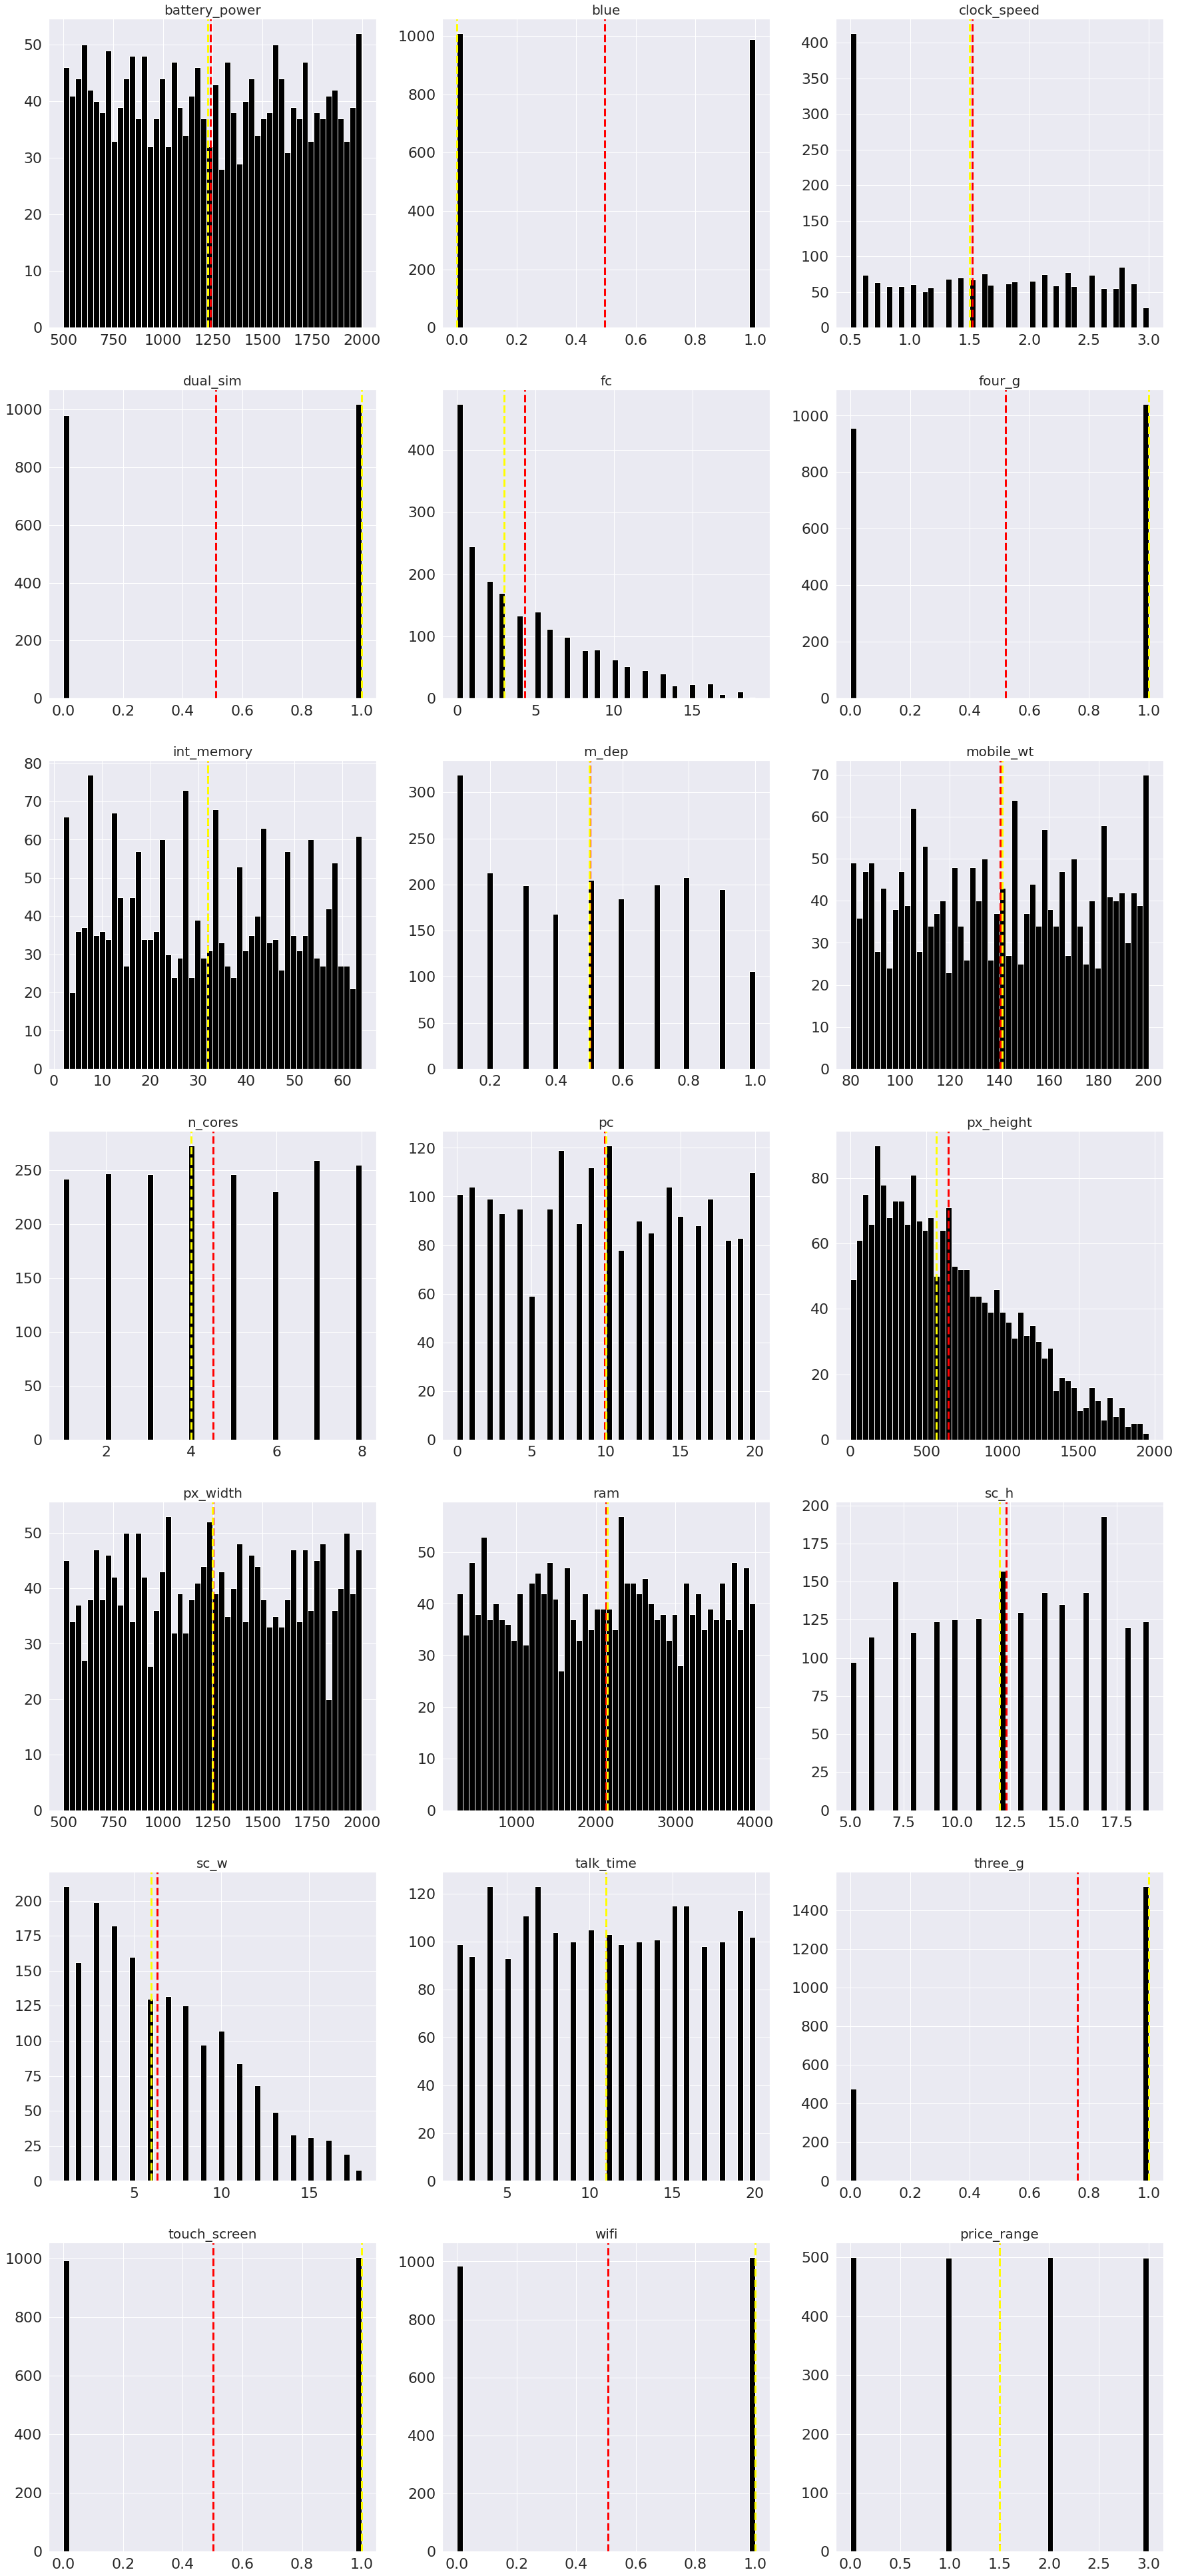

In [ ]:
# Calculating mean and median

# numerical_variables.remove('Hour')

# plt.figure(figsize = (30,70))

# for i in enumerate(columns):
#   plt.subplot(7, 3,i[0]+1)
#   feature = df[i[1]]
#   feature.hist(bins=50,color = 'black')
#   plt.axvline(feature.mean(),color = 'red',linestyle='dashed', linewidth=3)
#   plt.axvline(feature.median(),color = 'yellow',linestyle='dashed',linewidth=3)
#   plt.title(i[1],fontsize = 20)

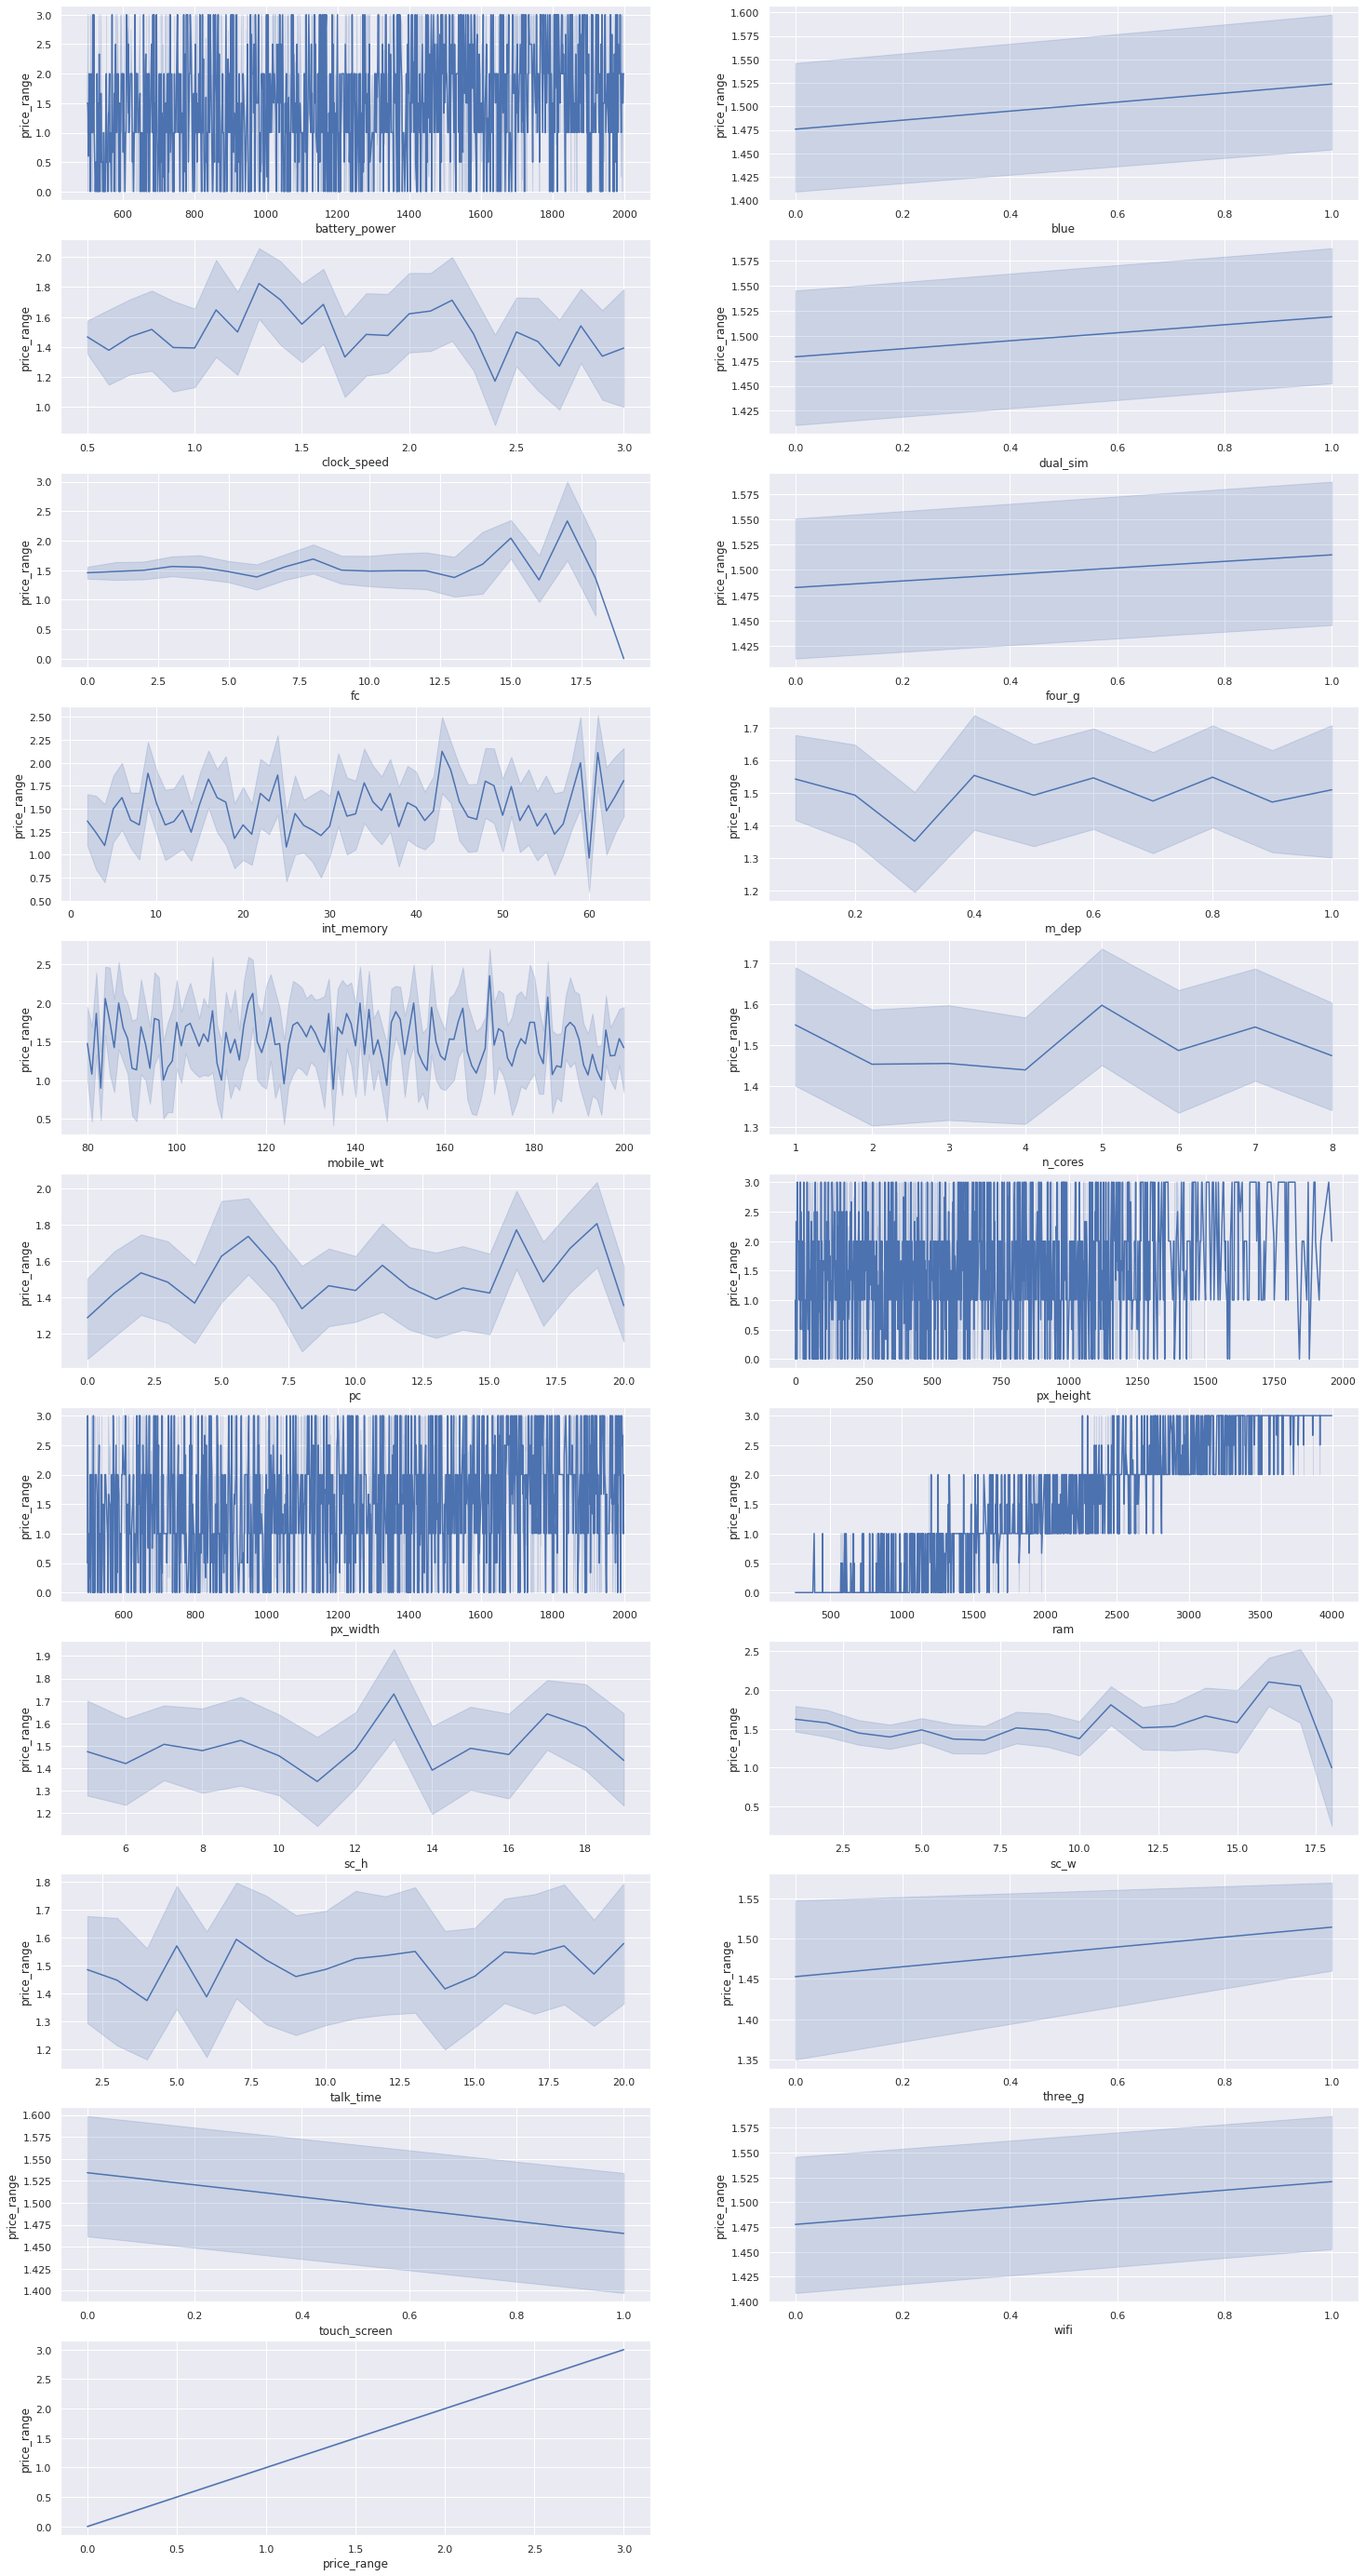

In [ ]:
# line plot for numerical variables

# sns.set_theme(style="darkgrid")
# plt.figure(figsize = (25, 50))
# for i in enumerate(columns):
#   plt.subplot(11,2,i[0]+1)
#   sns.lineplot(x=df[i[1]],y='price_range',data=df,palette='Grouped')

Text(0.5, 1.0, 'Feature Multicolinearity MAP')

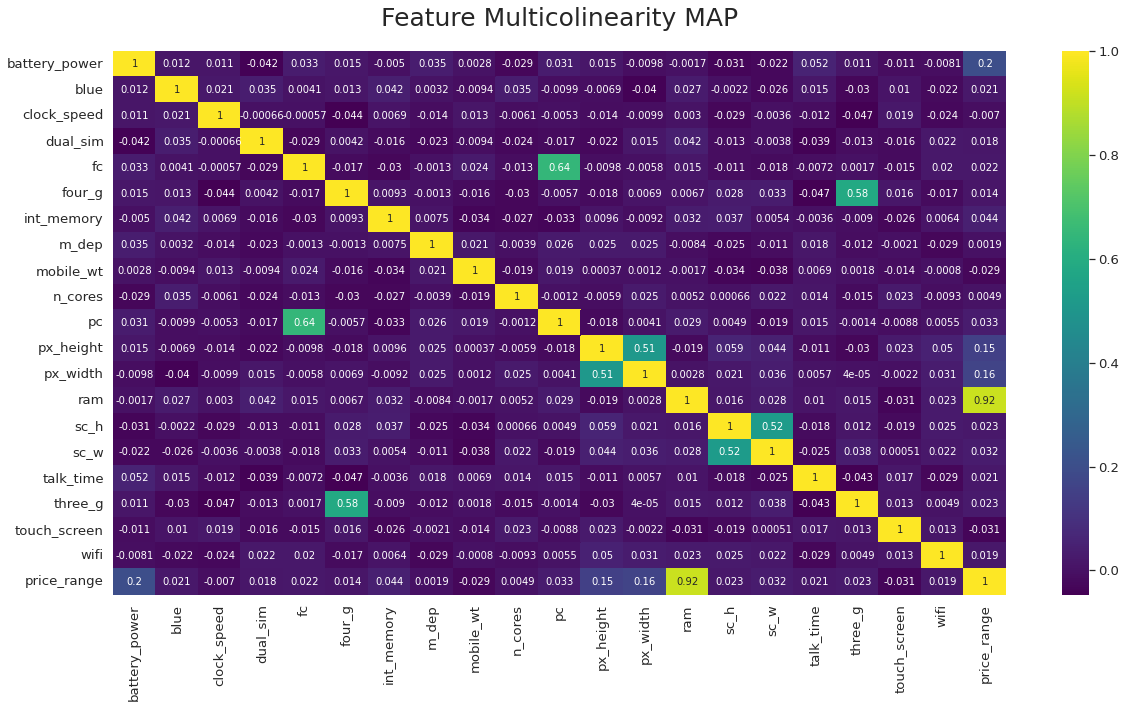

In [ ]:
#Multicolinearity

# corr= df.corr()
# plt.figure(figsize=(20,10))
# sns.set(font_scale=1.2)
# sns.heatmap(corr,annot=True, cmap='viridis',annot_kws={"size": 10})
# plt.title('Feature Multicolinearity MAP', fontsize = 25, pad=25)

In [ ]:
bvc=df.loc[:,['blue','dual_sim','four_g','three_g','wifi','touch_screen']]

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

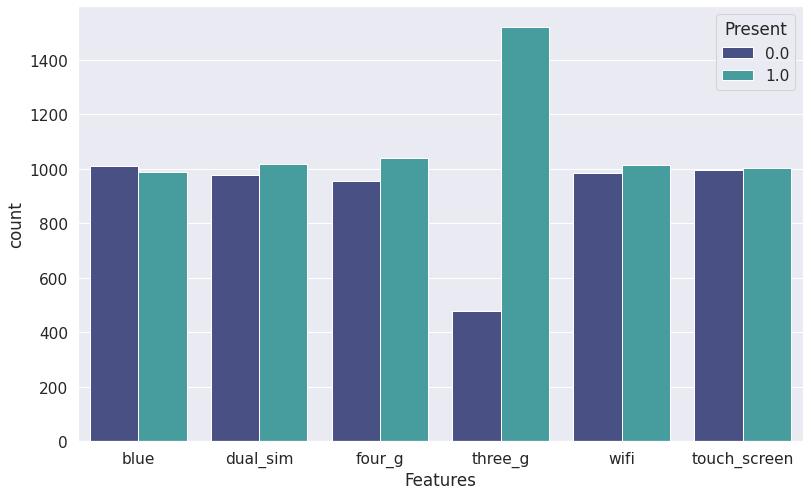

In [ ]:
# Countplot for binary categorical variables.

dd = bvc.melt(var_name='Features', value_name='Present')
plt.figure(figsize= (13,8))
sns.set(font_scale=1.4)
sns.countplot(x='Features', hue='Present', data=dd,palette='mako')
plt.show()

In [24]:
# creating a list of categorical independant variables
catv=['blue','dual_sim','four_g','three_g','wifi','touch_screen']

In [25]:
nuv=df.columns.to_list()


In [26]:
rr=['blue','dual_sim','four_g','three_g','wifi','touch_screen','price_range']

In [27]:
for i in rr:
  nuv.remove(i)

In [28]:
# list of numeric independant variables
nv=nuv
nv

['battery_power',
 'clock_speed',
 'fc',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time']

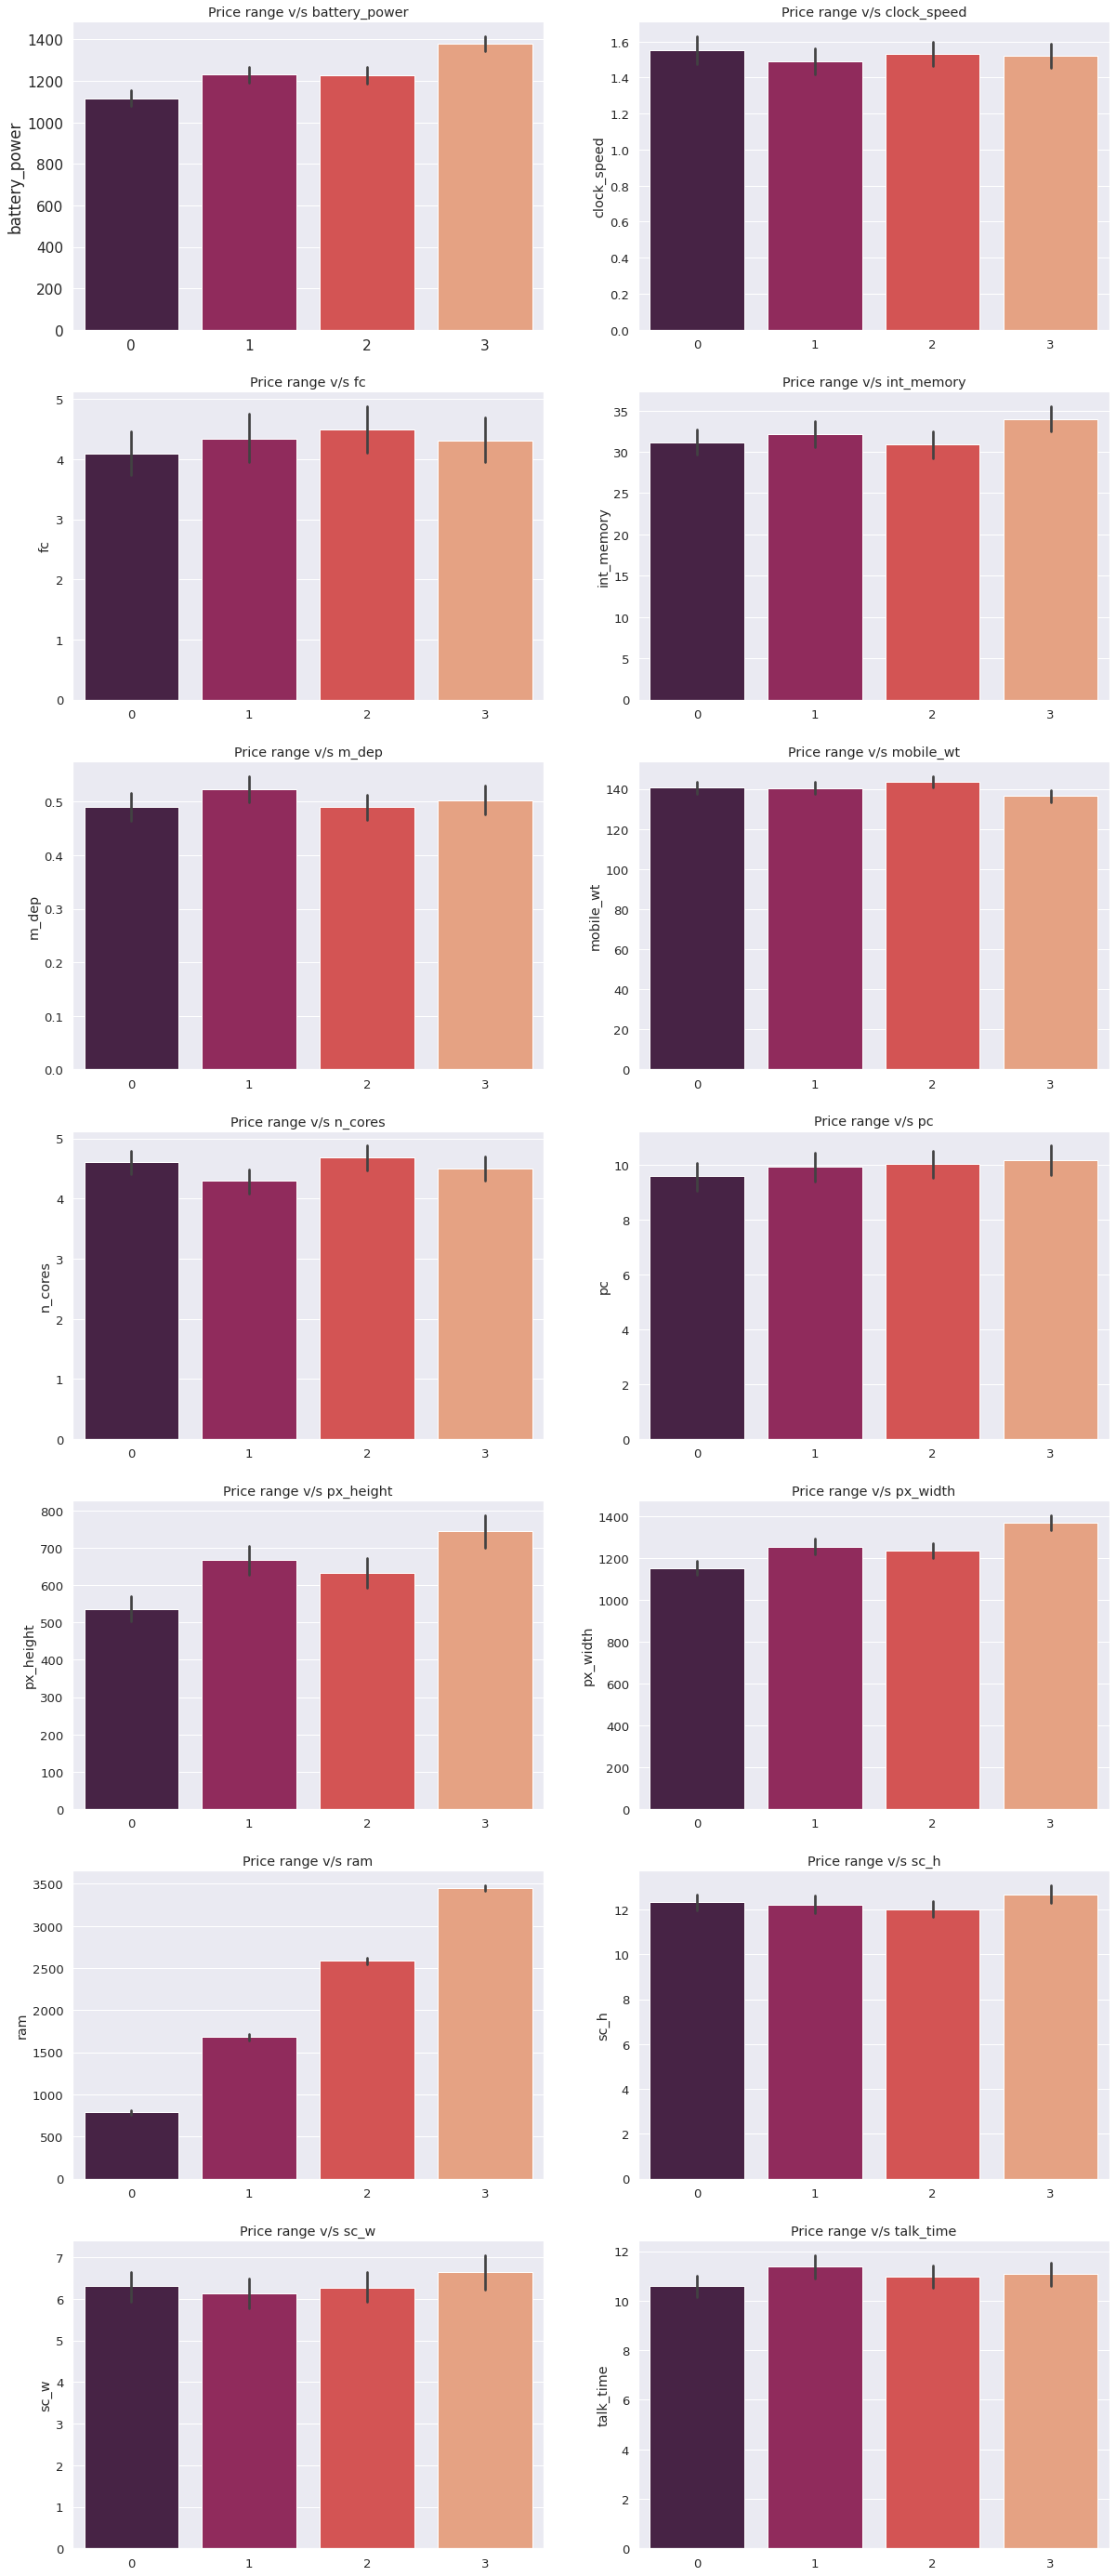

In [ ]:
# plotting  price_range vs other fearures

# plt.figure(figsize=(20,50))
# counter=1
# for i in nv:
#   plt.subplot(7,2,counter)
#   sns.set(font_scale=1.2)
#   sns.barplot(x=df['price_range'],y=df[i], palette="rocket").set(xlabel=None)
#   plt.title(f'Price range v/s {i}')
#   counter=counter+1

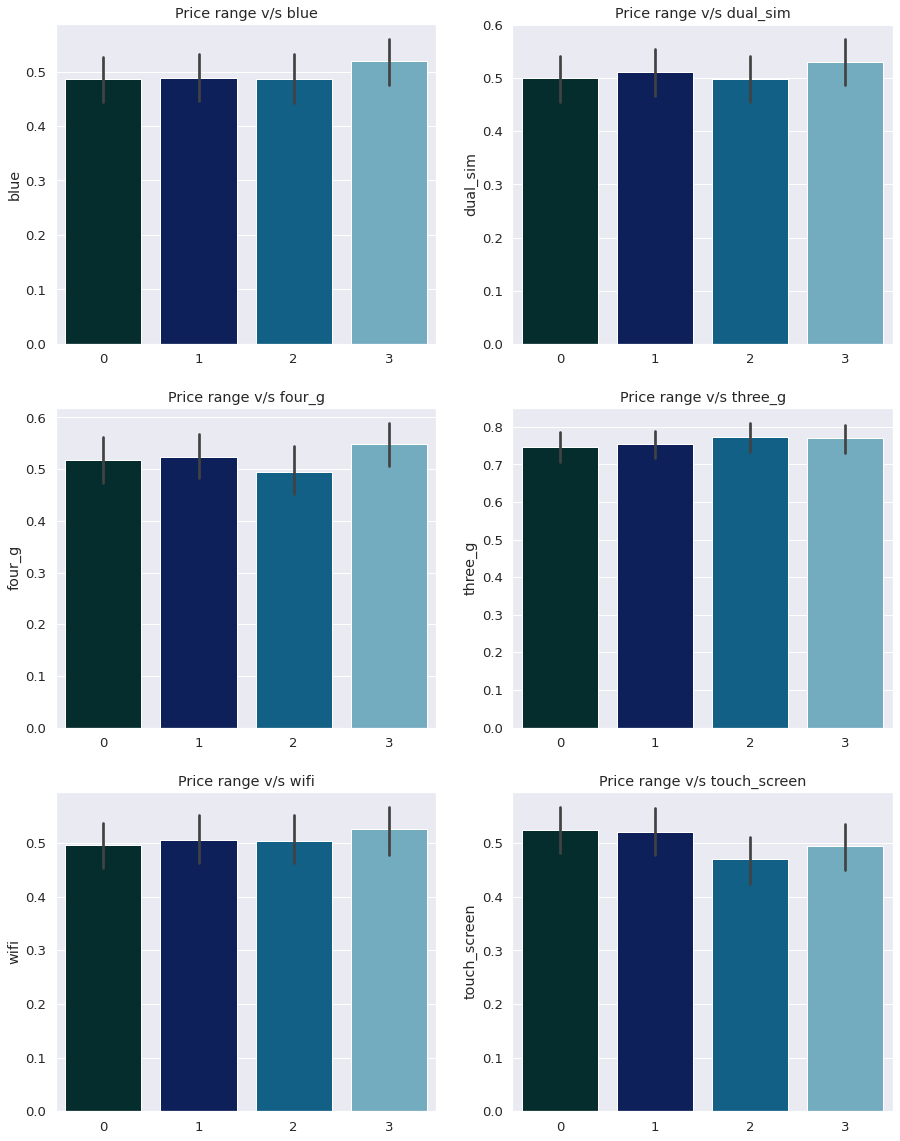

In [ ]:
# plotting  price_range vs other fearures

# plt.figure(figsize=(15,20))
# counter=1
# for i in catv:
#   plt.subplot(3,2,counter)
#   sns.set(font_scale=1.2)
#   sns.barplot(x=df['price_range'],y=df[i], palette="ocean").set(xlabel=None)
#   plt.title(f'Price range v/s {i}')
#   counter=counter+1

In [29]:
# Checking the counts of binary categorical variables by grouping price range.
group_by_price=df.groupby(['price_range']).agg({'blue':'value_counts','dual_sim':'value_counts','four_g':'value_counts','three_g':'value_counts','touch_screen':'value_counts','wifi':'value_counts'}).unstack()


In [30]:
group_by_price

blue      dual_sim      four_g      three_g      touch_screen  \
             0.0  1.0      0.0  1.0    0.0  1.0     0.0  1.0          0.0   
price_range                                                                 
0.0          257  243      250  250    241  259     127  373          238   
1.0          255  244      244  255    238  261     122  377          239   
2.0          257  243      251  249    253  247     113  387          265   
3.0          240  259      234  265    225  274     115  384          252   

                 wifi       
             1.0  0.0  1.0  
price_range                 
0.0          262  252  248  
1.0          260  247  252  
2.0          235  248  252  
3.0          247  237  262

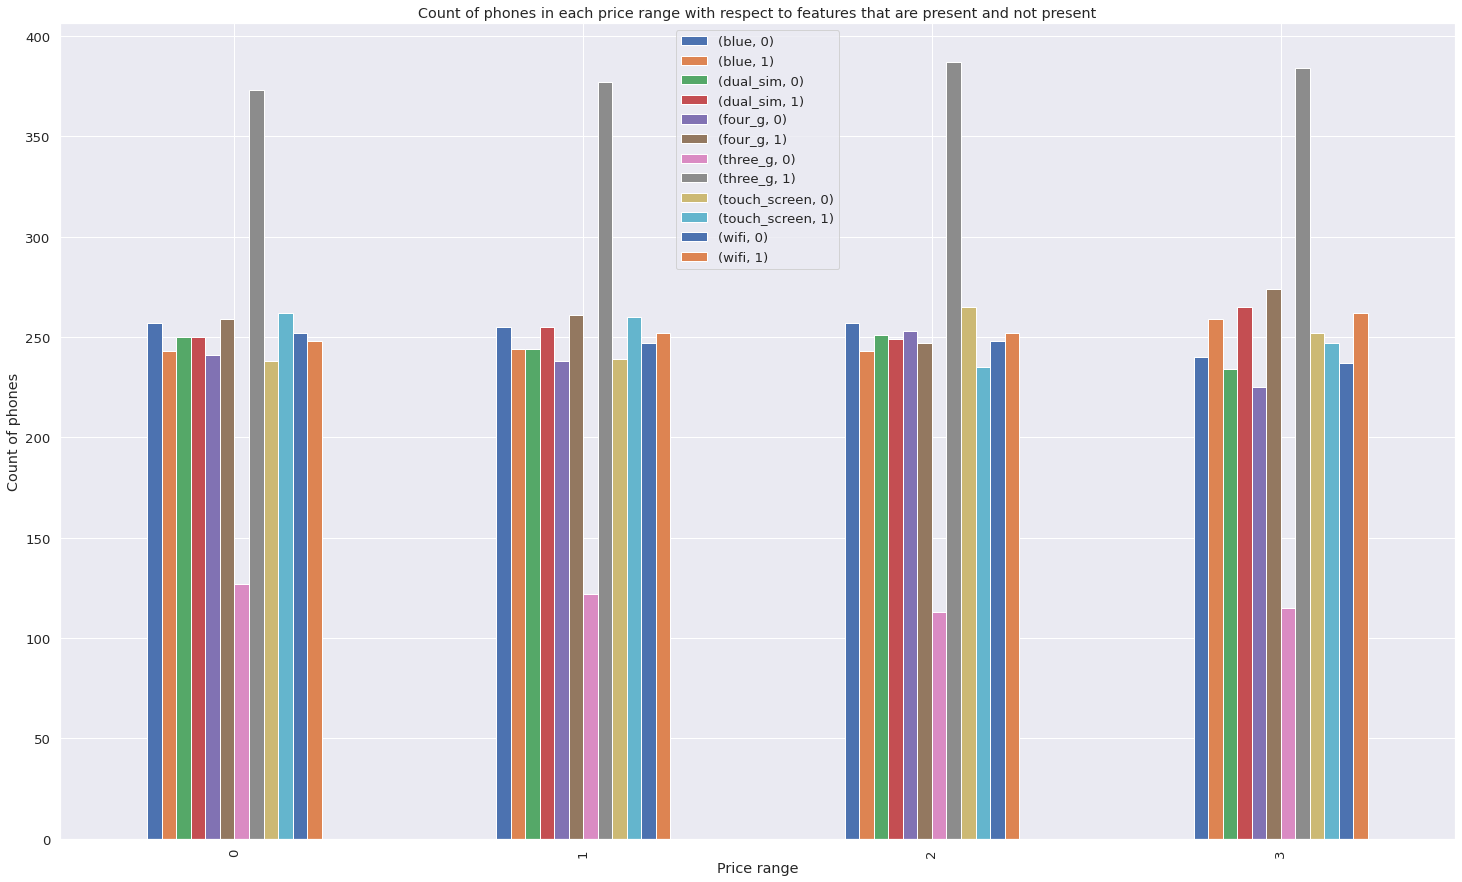

In [ ]:
# group_by_price.plot.bar(figsize=(25,15))
# plt.title('Count of phones in each price range with respect to features that are present and not present')
# plt.xlabel('Price range')
# plt.ylabel('Count of phones')
# plt.legend(loc='upper center')

In [31]:
independent_variables = df.columns.tolist()
independent_variables.remove('price_range')
# independent_variables.remove('Date')


dependent_variable = ['price_range']
print(independent_variables)
print(dependent_variable)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
['price_range']


In [32]:
X=df[independent_variables]
y=df[dependent_variable]

In [33]:
len(independent_variables)

20

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [35]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [36]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [37]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [38]:
# Chi2 score of all the features in the datset
featureScores


Specs          Score
0   battery_power   14006.667515
1            blue       0.782701
2     clock_speed       0.672292
3        dual_sim       0.674269
4              fc      10.151403
5          four_g       1.468373
6      int_memory      89.148626
7           m_dep       0.738846
8       mobile_wt      93.731705
9         n_cores       9.455162
10             pc       9.141022
11      px_height   17606.962872
12       px_width    9685.341009
13            ram  930468.599482
14           sc_h       9.505140
15           sc_w       9.426742
16      talk_time      13.433547
17        three_g       0.326147
18   touch_screen       1.908358
19           wifi       0.451301

In [39]:
z=featureScores.nlargest(10,'Score')
selected_features=z['Specs'].tolist()
selected_features

['ram',
 'px_height',
 'battery_power',
 'px_width',
 'mobile_wt',
 'int_memory',
 'talk_time',
 'fc',
 'sc_h',
 'n_cores']

In [40]:
X1=df[selected_features]
X1


ram  px_height  battery_power  px_width  mobile_wt  int_memory  \
0     2549.0       20.0          842.0     756.0      188.0         7.0   
1     2631.0      905.0         1021.0    1988.0      136.0        53.0   
2     2603.0     1263.0          563.0    1716.0      145.0        41.0   
3     2769.0     1216.0          615.0    1786.0      131.0        10.0   
4     1411.0     1208.0         1821.0    1212.0      141.0        44.0   
...      ...        ...            ...       ...        ...         ...   
1993   668.0     1222.0          794.0    1890.0      106.0         2.0   
1994  2032.0      915.0         1965.0    1965.0      187.0        39.0   
1995  3057.0      868.0         1911.0    1632.0      108.0        36.0   
1996   869.0      336.0         1512.0     670.0      145.0        46.0   
1997  3919.0      483.0          510.0     754.0      168.0        45.0   

      talk_time    fc  sc_h  n_cores  
0          19.0   1.0   9.0      2.0  
1           7.0   0.0  17.0      3.0  
2           9.0   2.0  11.0      5.0  
3          11.0   0.0  16.0      6.0  
4          15.0  13.0   8.0      2.0  
...         ...   ...   ...      ...  
1993       19.0   0.0  13.0      6.0  
1994       16.0   0.0  11.0      4.0  
1995        5.0   1.0   9.0      8.0  
1996       19.0   4.0  18.0      5.0  
1997        2.0   5.0  19.0      6.0  

[1998 rows x 10 columns]

In [41]:
# creating a class list
#Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

In [42]:
# Defining a fucnction for plotting roc curve
def plot_Auc_roc(y_test,pred_prob):
  '''It will take y_test and y predicted probabilities
  as input and will plot the roc curve.'''

  fpr = {}
  tpr = {}
  thresh ={}

  n_class = 4

  for i in range(n_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
      
  # plotting    
  plt.figure(figsize=(12,8))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= ((f'Class 0(Low cost) vs Rest, AUC= {round(auc(fpr[0],tpr[0]),4)}')))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=((f'Class 1(Medium cost) vs Rest, AUC= {round(auc(fpr[1],tpr[1]),4)}')))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=((f'Class 2(High cost) vs Rest, AUC= {round(auc(fpr[2],tpr[2]),4)}')))
  plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=((f'Class 3(Very High cost) vs Rest, AUC= {round(auc(fpr[3],tpr[3]),4)}')))
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')

In [228]:
# Defining a function to standardize and then perform fit and transform print the test and train accuracy.
# Reusable code
# plot confusion matrix,roc,auc plots
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=4)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_test_pred=model.predict(X_test)
    y_train_pred=model.predict(X_train)

    cf_matrix=confusion_matrix(y_test,y_test_pred)
    Class_cat = ['low cost','medium cost', 'high cost', 'very high cost']

    print(f'Train set accuracy score of is {accuracy_score(y_train,y_train_pred)}')
    print(f'Test set accuracy score of  is {accuracy_score(y_test,y_test_pred)}')
    print('')
    
    print(f'Classification report') 
    print('')
    print(classification_report(y_train,y_train_pred))
    print(classification_report(y_test,y_test_pred))
    plot_confusion_matrix(ml_model,X_test,y_test,cmap='cividis')
    plt.grid(False)
    plt.title('Confusion Matrix-test dataset',fontsize=15)
    plt.show()

    pred_prob = ml_model.predict_proba(X_test)
    plot_Auc_roc(y_test,pred_prob)

    

Train set accuracy score of is 1.0
Test set accuracy score of  is 0.8158158158158159

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       264
         1.0       1.00      1.00      1.00       244
         2.0       1.00      1.00      1.00       243
         3.0       1.00      1.00      1.00       248

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90       236
         1.0       0.75      0.78      0.77       255
         2.0       0.74      0.72      0.73       257
         3.0       0.88      0.87      0.87       251

    accuracy                           0.82       999
   macro avg       0.82      0.82      0.82       999
weighted avg       0.82      0.82      0.82       999



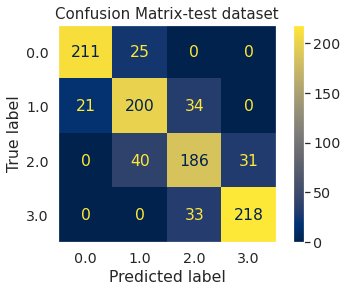

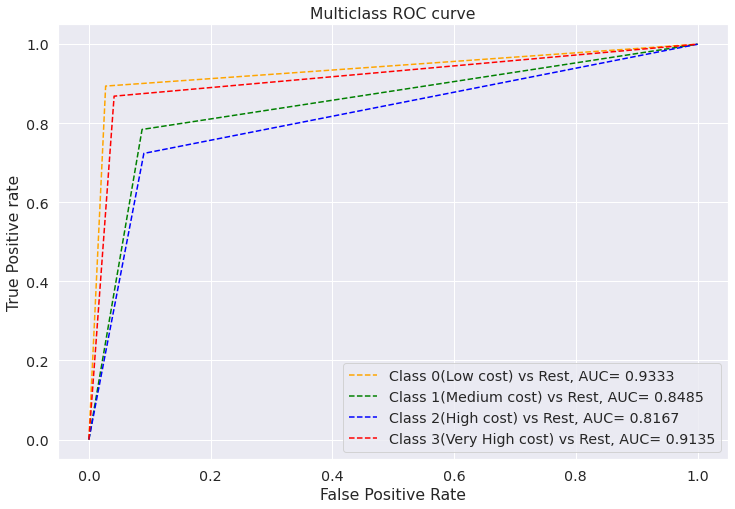

In [229]:
predict(DecisionTreeClassifier(),X1,y)

Train set accuracy score of is 1.0
Test set accuracy score of  is 0.8818818818818819

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       264
         1.0       1.00      1.00      1.00       244
         2.0       1.00      1.00      1.00       243
         3.0       1.00      1.00      1.00       248

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       236
         1.0       0.84      0.81      0.82       255
         2.0       0.84      0.83      0.84       257
         3.0       0.93      0.95      0.94       251

    accuracy                           0.88       999
   macro avg       0.88      0.88      0.88       999
weighted avg       0.88      0.88      0.88       999



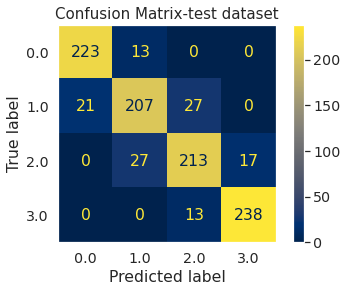

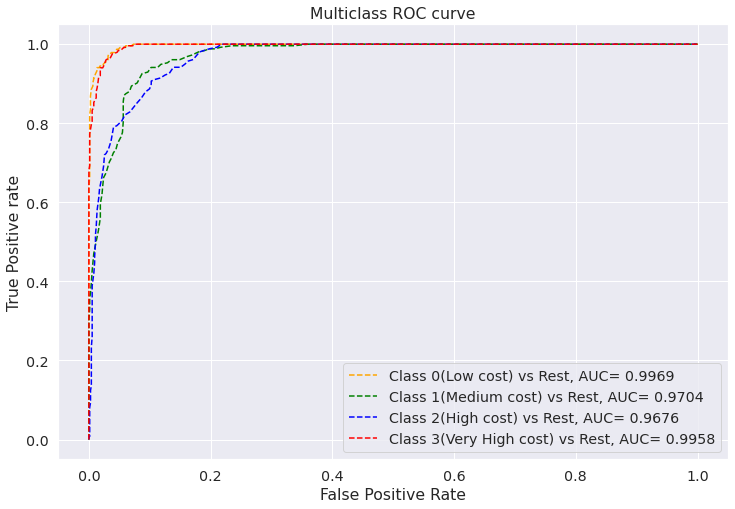

In [230]:
predict(RandomForestClassifier(),X1,y)

Train set accuracy score of is 1.0
Test set accuracy score of  is 0.8938938938938938

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       264
         1.0       1.00      1.00      1.00       244
         2.0       1.00      1.00      1.00       243
         3.0       1.00      1.00      1.00       248

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       236
         1.0       0.86      0.85      0.85       255
         2.0       0.85      0.84      0.84       257
         3.0       0.94      0.94      0.94       251

    accuracy                           0.89       999
   macro avg       0.89      0.90      0.89       999
weighted avg       0.89      0.89      0.89       999



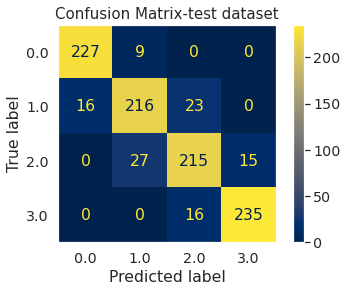

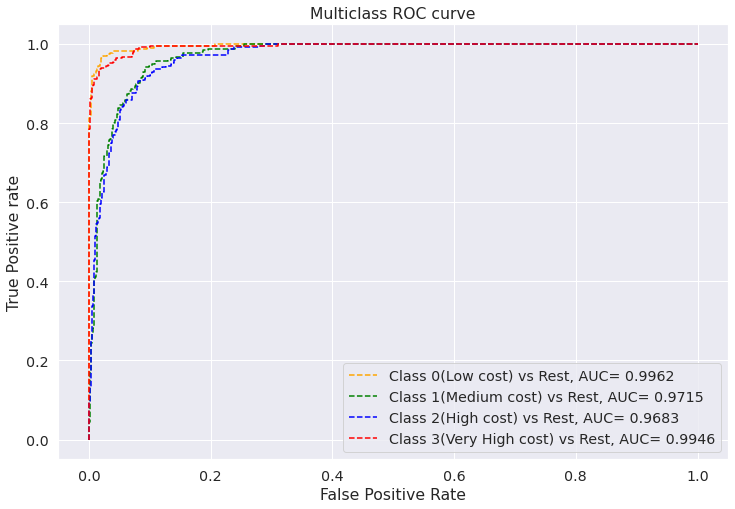

In [231]:
predict(GradientBoostingClassifier(),X1,y)

Train set accuracy score of is 0.7777777777777778
Test set accuracy score of  is 0.6256256256256256

Classification report

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       264
         1.0       0.67      0.72      0.69       244
         2.0       0.71      0.66      0.68       243
         3.0       0.90      0.82      0.86       248

    accuracy                           0.78       999
   macro avg       0.78      0.77      0.78       999
weighted avg       0.78      0.78      0.78       999

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.74       236
         1.0       0.45      0.49      0.47       255
         2.0       0.54      0.49      0.52       257
         3.0       0.86      0.73      0.79       251

    accuracy                           0.63       999
   macro avg       0.64      0.63      0.63       999
weighted avg       0.63      0.63      0.63       999



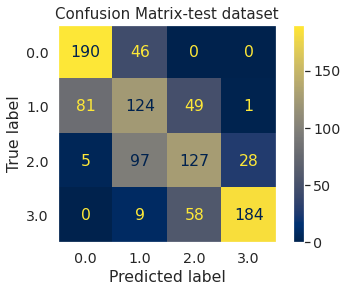

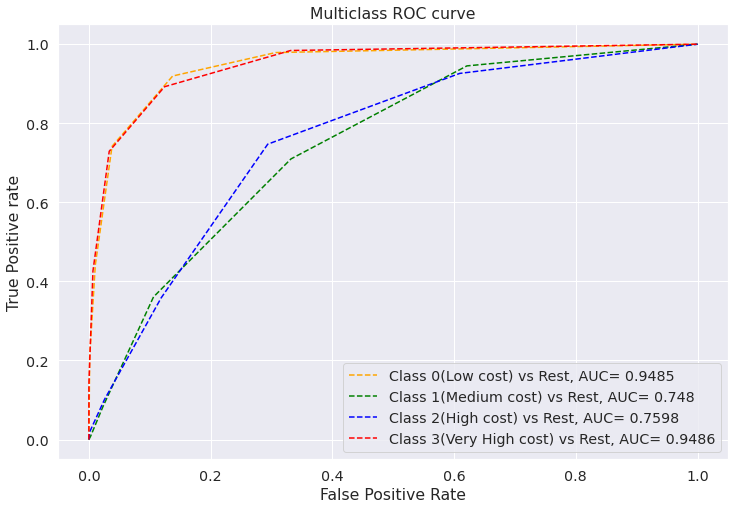

In [232]:
predict(KNeighborsClassifier(),X1,y)

Train set accuracy score of is 0.970970970970971
Test set accuracy score of  is 0.8948948948948949

Classification report

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       264
         1.0       0.96      0.94      0.95       244
         2.0       0.97      0.95      0.96       243
         3.0       0.99      0.99      0.99       248

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       236
         1.0       0.87      0.85      0.86       255
         2.0       0.84      0.86      0.85       257
         3.0       0.93      0.93      0.93       251

    accuracy                           0.89       999
   macro avg       0.90      0.90      0.90       999
weighted avg       0.90      0.89      0.89       999



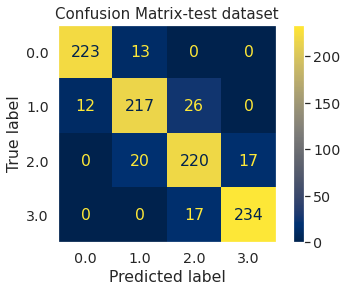

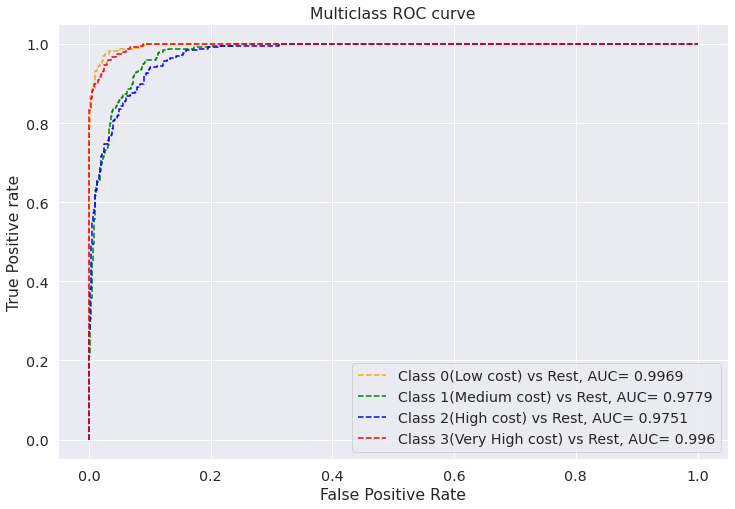

In [233]:
predict(SVC(probability=True),X1,y)

Train set accuracy score of is 0.96996996996997
Test set accuracy score of  is 0.9629629629629629

Classification report

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       264
         1.0       0.97      0.95      0.96       244
         2.0       0.98      0.95      0.96       243
         3.0       0.96      0.99      0.98       248

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       236
         1.0       0.94      0.96      0.95       255
         2.0       0.95      0.93      0.94       257
         3.0       0.97      0.98      0.98       251

    accuracy                           0.96       999
   macro avg       0.96      0.96      0.96       999
weighted avg       0.96      0.96      0.96       999



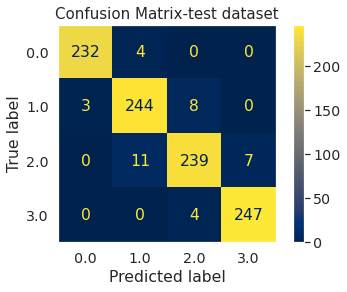

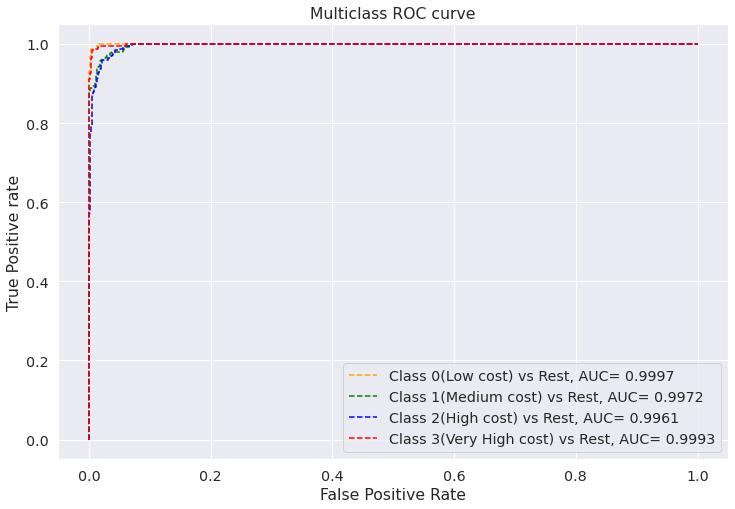

In [234]:
predict(LogisticRegression(),X1,y)

In [ ]:
#Hyperparameter tuned log
Log_optimal=LogisticRegression(C=7000,max_iter=100, solver='newton-cg')

In [ ]:
#Hyperparameter tuned svc model
svc_optimal=SVC(C=10, degree=1, gamma=0.01, kernel='linear',probability=True)

Train set accuracy score of is 0.9819819819819819
Test set accuracy score of  is 0.980980980980981

Classification report

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       264
         1.0       0.98      0.98      0.98       244
         2.0       0.96      0.97      0.97       243
         3.0       0.98      0.98      0.98       248

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       236
         1.0       0.97      0.98      0.97       255
         2.0       0.97      0.96      0.96       257
         3.0       0.98      0.99      0.99       251

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999



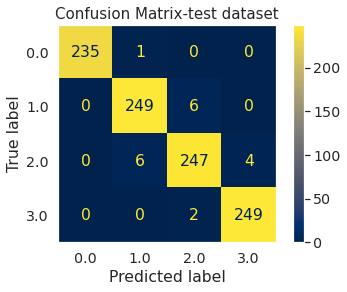

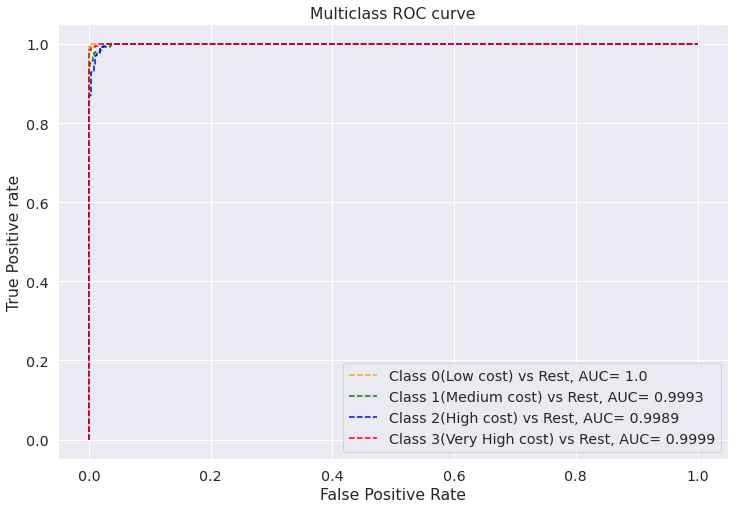

In [236]:
#Hyperparameter tuned
predict(Log_optimal,X1,y)

Train set accuracy score of is 0.978978978978979
Test set accuracy score of  is 0.9719719719719719

Classification report

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       264
         1.0       0.98      0.97      0.97       244
         2.0       0.98      0.97      0.97       243
         3.0       0.98      0.99      0.98       248

    accuracy                           0.98       999
   macro avg       0.98      0.98      0.98       999
weighted avg       0.98      0.98      0.98       999

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       236
         1.0       0.95      0.96      0.95       255
         2.0       0.96      0.96      0.96       257
         3.0       0.99      0.99      0.99       251

    accuracy                           0.97       999
   macro avg       0.97      0.97      0.97       999
weighted avg       0.97      0.97      0.97       999



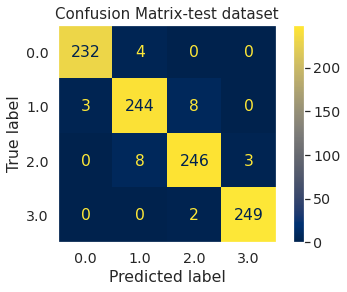

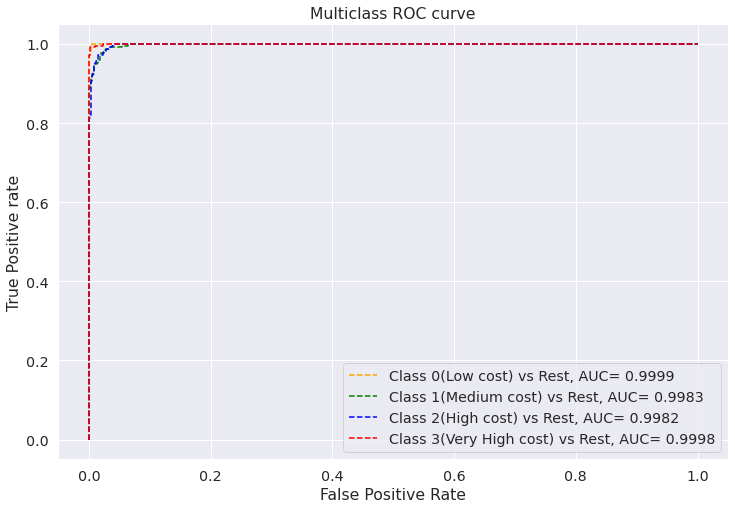

In [237]:
#Hyperparameter tuned
predict(svc_optimal,X1,y)

In [238]:
#Feature importance for tree based algorithms 

def plot_feature_importance(algo):
  ''' Takes the alogorithm as input and 
  plots the feature importance graph'''
  
  # get importance
  X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.5,random_state=4)
  sc=StandardScaler()
  X_train=sc.fit_transform(X_train)
  X_test=sc.transform(X_test)
  model=algo.fit(X_train,y_train)
  importance = algo.feature_importances_
  feat_importance=pd.DataFrame({'Features':X1.columns,'score':importance}).sort_values(by='score',ascending=False)
  plt.figure(figsize=(10,8))
  sns.barplot(x=feat_importance['score'],y=feat_importance['Features'],palette='Dark2')
  plt.title('Feature Importance')

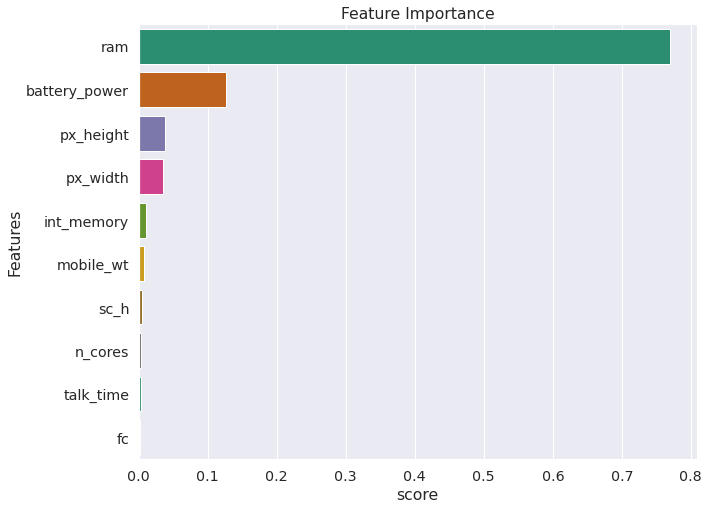

In [239]:
plot_feature_importance(GradientBoostingClassifier())

In [240]:
def feature_importance_plot(algo):

  X_train,X_test,y_train,y_test=train_test_split(X1,y,test_size=0.5,random_state=4) 
  sc=StandardScaler()
  X1_train=sc.fit_transform(X_train)
  X1_test=sc.transform(X_test)
  algo.fit(X1_train,y_train) 
  imp_fe=pd.Series(abs(algo.coef_[0])+abs(algo.coef_[1])+abs(algo.coef_[2])+abs(algo.coef_[3]),index=X_train.columns).nlargest(12).reset_index()
  imp_fe.rename(columns = {'index':'Feature', 0:'score'}, inplace = True)
  plt.figure(figsize=(12,8))
  sns.set(font_scale = 1.3)
  sns.barplot(x = 'score',y = 'Feature',data = imp_fe,palette='Spectral')
  plt.title('Feature Importance',fontdict= { 'fontsize': 24})

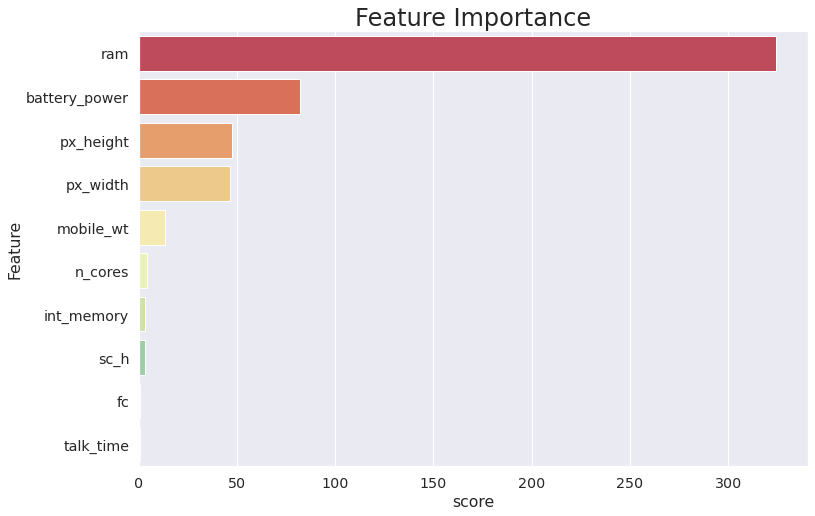

In [241]:
feature_importance_plot(Log_optimal)

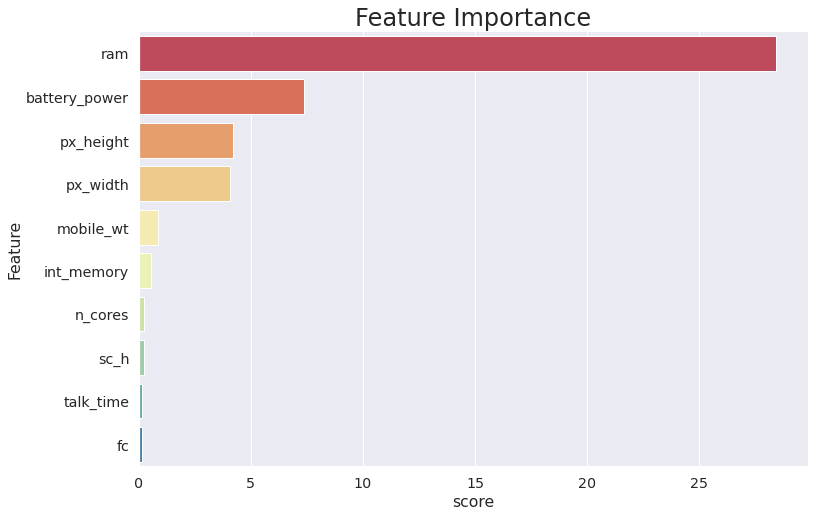

In [209]:
feature_importance_plot(svc_optimal)

In [252]:
# Plotting scatter plot to visualize different classes with respect to top two important features

In [243]:
df_a=df[df['price_range']==0]    # creating df of class 0
df_b=df[df['price_range']==1]    #creating df of class 1
df_c=df[df['price_range']==2]    #creating df of class 2
df_d=df[df['price_range']==3]     #creating df of class 3

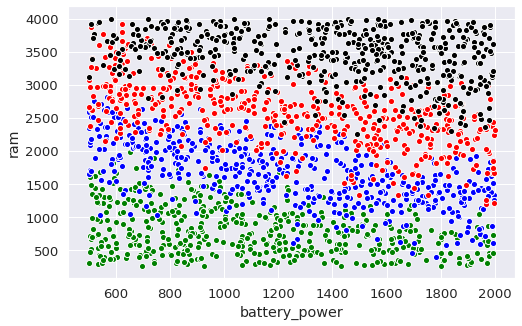

In [251]:
plt.figure(figsize=(8,5))
sns.set(font_scale = 1.2)
sns.scatterplot(y=df_a['ram'],x=df_a['battery_power'],color='green',marker='.',s=150)  
sns.scatterplot(y=df_b['ram'],x=df_b['battery_power'],color='blue',marker='.',s=150)   
sns.scatterplot(y=df_c['ram'],x=df_c['battery_power'],color='red',marker='.',s=150)
sns.scatterplot(y=df_d['ram'],x=df_d['battery_power'],color='black',marker='.',s=150)